In [17]:
import tensorflow

In [18]:
import keras

In [19]:
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv('UNSW_NB15_training-setbinaryclass.csv')

In [21]:
df = df.sample(n=80000, replace=True)

In [22]:
df.label.value_counts()

1    43912
0    36088
Name: label, dtype: int64

In [23]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)
# check for cardinality in categorical variables
for var in categorical:    
    print(var, ' contains ', len(df[var].unique()), ' labels')

There are 4 categorical variables

The categorical variables are : ['proto', 'service', 'state', 'attack_cat']
proto  contains  131  labels
service  contains  13  labels
state  contains  6  labels
attack_cat  contains  4  labels


In [24]:
df['proto'] = df['proto'].astype('category')
df['service'] = df['service'].astype('category')
df['state'] = df['state'].astype('category')

cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [25]:
# Categorical boolean mask
categorical_feature_mask = df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()

In [26]:
X = df.iloc[:, :-2]
Y=df['label']

In [27]:
X

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
2762,2763,0.000008,118,0,4,2,0,200,0,125000.000300,...,3,2,2,7,0,0,0,2,7,0
81022,81023,1.263734,111,0,3,10,8,2516,354,13.452198,...,1,1,1,1,0,0,0,2,1,0
27058,27059,0.195147,117,0,2,4,4,568,304,35.870396,...,4,1,1,3,0,0,0,4,6,0
30900,30901,0.008946,111,0,3,36,38,2334,16290,8160.071844,...,2,1,1,1,0,0,0,7,7,0
46804,46805,0.000004,117,2,4,2,0,114,0,250000.000600,...,7,7,3,7,0,0,0,7,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18485,18486,0.000035,117,2,4,2,0,114,0,28571.427810,...,40,40,18,51,0,0,0,40,51,0
32469,32470,0.012981,111,0,3,36,38,2334,16290,5623.603574,...,3,1,1,1,0,0,0,3,5,0
74204,74205,0.914916,111,5,3,10,10,804,1420,20.766934,...,1,1,1,2,0,0,1,2,2,0
12710,12711,0.633686,111,9,3,18,16,1580,1872,52.076264,...,1,1,1,1,0,0,0,1,1,0


In [28]:
Y

2762     1
81022    0
27058    0
30900    0
46804    1
        ..
18485    1
32469    0
74204    0
12710    1
18964    1
Name: label, Length: 80000, dtype: int64

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
# Create an Extra Trees Classifier
extra_trees = ExtraTreesClassifier()

# Fit the model to your data
extra_trees.fit(X, Y)

# Print feature importances
feature_importances = extra_trees.feature_importances_
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

Feature Importances:
id: 0.22008773679267865
dur: 0.005796484946927845
proto: 0.005414165601779842
service: 0.02862108685421623
state: 0.03844026272093616
spkts: 0.0033604071844025086
dpkts: 0.003510682272713454
sbytes: 0.01214597885015085
dbytes: 0.004924116021032464
rate: 0.02721753375354119
sttl: 0.10301569041698545
dttl: 0.07989238780963658
sload: 0.0071726137664532615
dload: 0.019578674466938083
sloss: 0.005986900077963716
dloss: 0.004726085247644773
sinpkt: 0.008323804467918573
dinpkt: 0.0029584203035708787
sjit: 0.0027971422532828455
djit: 0.0025958373099809772
swin: 0.06832741953338034
stcpb: 0.005112403570083921
dtcpb: 0.006152021044075902
dwin: 0.02609875878560497
tcprtt: 0.012325927344853563
synack: 0.00725052631310818
ackdat: 0.006228699402274489
smean: 0.01887823169067646
dmean: 0.021339787916611782
trans_depth: 0.006608382600096746
response_body_len: 0.0017414296652408538
ct_srv_src: 0.019460877685347155
ct_state_ttl: 0.06015061577192477
ct_dst_ltm: 0.010360033884494371
c

In [30]:
# Print feature importances in sorted order
feature_importances = extra_trees.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort indices in descending order

print("Feature Importances (Sorted):")
for index in sorted_indices:
    print(f"{X.columns[index]}: {feature_importances[index]}")

Feature Importances (Sorted):
id: 0.22008773679267865
sttl: 0.10301569041698545
dttl: 0.07989238780963658
swin: 0.06832741953338034
ct_state_ttl: 0.06015061577192477
ct_dst_src_ltm: 0.054337509922512704
state: 0.03844026272093616
service: 0.02862108685421623
ct_dst_sport_ltm: 0.02765010585019174
rate: 0.02721753375354119
ct_srv_dst: 0.02682772806774765
dwin: 0.02609875878560497
dmean: 0.021339787916611782
dload: 0.019578674466938083
ct_srv_src: 0.019460877685347155
smean: 0.01887823169067646
ct_src_dport_ltm: 0.013540508084090106
tcprtt: 0.012325927344853563
sbytes: 0.01214597885015085
ct_src_ltm: 0.011288687192913276
ct_dst_ltm: 0.010360033884494371
sinpkt: 0.008323804467918573
synack: 0.00725052631310818
sload: 0.0071726137664532615
trans_depth: 0.006608382600096746
ackdat: 0.006228699402274489
dtcpb: 0.006152021044075902
sloss: 0.005986900077963716
dur: 0.005796484946927845
proto: 0.005414165601779842
is_sm_ips_ports: 0.005298440644090014
stcpb: 0.005112403570083921
dbytes: 0.004924

In [31]:
# Define importance threshold
threshold = 0.021

# Print selected features with importance >= threshold
print("Selected Features with Importance >= 0.021:")
for feature, importance in zip(X.columns, extra_trees.feature_importances_):
    if importance >= threshold:
        print(f"{feature}: {importance}")

Selected Features with Importance >= 0.021:
id: 0.22008773679267865
service: 0.02862108685421623
state: 0.03844026272093616
rate: 0.02721753375354119
sttl: 0.10301569041698545
dttl: 0.07989238780963658
swin: 0.06832741953338034
dwin: 0.02609875878560497
dmean: 0.021339787916611782
ct_state_ttl: 0.06015061577192477
ct_dst_sport_ltm: 0.02765010585019174
ct_dst_src_ltm: 0.054337509922512704
ct_srv_dst: 0.02682772806774765


In [32]:
threshold = 0.021

# Select features with importance >= threshold
selected_features = []
for index, importance in enumerate(extra_trees.feature_importances_):
    if importance >= threshold:
        selected_features.append(X.columns[index])

# Filter X based on selected features
X = X[selected_features]

# Now you can use X_selected for further processing
print("Selected Features:", selected_features)
print("Shape of X_selected:", X.shape)

Selected Features: ['id', 'service', 'state', 'rate', 'sttl', 'dttl', 'swin', 'dwin', 'dmean', 'ct_state_ttl', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_srv_dst']
Shape of X_selected: (80000, 13)


In [33]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
sScaler = StandardScaler()
rescaleX = sScaler.fit_transform(X)
df_rescaled = pd.DataFrame(data=rescaleX)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(rescaleX,Y, test_size=0.3, random_state=10)

In [68]:
y_train

28093    0
4387     1
45176    1
72000    0
33378    0
        ..
47052    1
58146    1
50349    1
9601     1
19700    1
Name: label, Length: 56000, dtype: int64

In [18]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from datetime import datetime

In [20]:
#Model 1 for all features
#Initialising the Artificial Neural Network
model = Sequential()
#Creating the Input-layer and the first hidden layer
model.add(Dense(400, input_dim=13, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(400, activation='relu'))
#Creating the output  layer
model.add(Dense(2, activation='softmax'))
#Compiling the ANN classifier
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelhistory=model.fit(X_train, y_train,validation_split=0.33, batch_size=50, epochs=100)

Epoch 1/100
751/751 [==============================] - 45s 58ms/step - loss: 0.0743 - accuracy: 0.9739 - val_loss: 0.0519 - val_accuracy: 0.9805
Epoch 2/100
751/751 [==============================] - 42s 56ms/step - loss: 0.0338 - accuracy: 0.9897 - val_loss: 0.0352 - val_accuracy: 0.9892
Epoch 3/100
751/751 [==============================] - 42s 56ms/step - loss: 0.0296 - accuracy: 0.9911 - val_loss: 0.0275 - val_accuracy: 0.9931
Epoch 4/100
751/751 [==============================] - 42s 56ms/step - loss: 0.0246 - accuracy: 0.9929 - val_loss: 0.0264 - val_accuracy: 0.9918
Epoch 5/100
751/751 [==============================] - 43s 57ms/step - loss: 0.0216 - accuracy: 0.9938 - val_loss: 0.0209 - val_accuracy: 0.9942
Epoch 6/100
751/751 [==============================] - 44s 58ms/step - loss: 0.0246 - accuracy: 0.9937 - val_loss: 0.0182 - val_accuracy: 0.9968
Epoch 7/100
751/751 [==============================] - 43s 57ms/step - loss: 0.0208 - accuracy: 0.9942 - val_loss: 0.0207 - val_ac

from keras.models import Sequential

In [21]:
y_test

23151    1
79374    0
73817    0
44746    1
81935    0
        ..
77569    0
30329    0
46829    1
52079    1
81130    0
Name: label, Length: 24000, dtype: int64

In [22]:
y_testCat = to_categorical(y_test)
y_pred = model.predict(X_test)
model.evaluate(X_test,y_testCat)

750/750 [==============================] - 14s 17ms/step - loss: 0.0146 - accuracy: 0.9973


[0.014622257091104984, 0.9972916841506958]

In [70]:
for p in predictions:
    print (p)

[0. 1.]
[9.99882936e-01 1.16993055e-04]
[1.0000000e+00 1.9339735e-37]
[2.606258e-09 1.000000e+00]
[1. 0.]
[0. 1.]
[1.662578e-30 1.000000e+00]
[7.332426e-10 1.000000e+00]
[1.000000e+00 6.331597e-11]
[0.6700112 0.3299888]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[1.6355887e-04 9.9983644e-01]
[1.4506716e-07 9.9999988e-01]
[2.0591429e-08 1.0000000e+00]
[5.0144575e-27 1.0000000e+00]
[0. 1.]
[0. 1.]
[8.458292e-11 1.000000e+00]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1.00000e+00 7.65937e-13]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[9.9981183e-01 1.8817563e-04]
[7.740218e-09 1.000000e+00]
[1. 0.]
[0. 1.]
[0. 1.]
[9.9993074e-01 6.9231734e-05]
[1. 0.]
[3.3562346e-14 1.0000000e+00]
[1.0000000e+00 2.5012713e-27]
[1.0000000e+00 2.7794644e-31]
[9.9999690e-01 3.0636836e-06]
[1. 0.]
[1.732456e-14 1.000000e+00]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[9.9999845e-01 1.5371307e-06]
[1. 0.]
[0. 1.]
[2.8358555e-14 1.0000000e+00]
[0. 1.]
[9.999107e-01 8.926715e-05]
[1.0000000e+00 1.2691325e-32]
[1.000000e+0

[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[2.900104e-08 1.000000e+00]
[1. 0.]
[0. 1.]
[1. 0.]
[0.01287601 0.98712397]
[1. 0.]
[1. 0.]
[9.212862e-14 1.000000e+00]
[1. 0.]
[8.260364e-31 1.000000e+00]
[0.9971585  0.00284152]
[1.0000000e+00 9.4816075e-14]
[1. 0.]
[1.8399944e-18 1.0000000e+00]
[7.9032825e-04 9.9920964e-01]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[1.4651004e-11 1.0000000e+00]
[3.5542532e-18 1.0000000e+00]
[0.00775339 0.9922466 ]
[5.267775e-33 1.000000e+00]
[1. 0.]
[0. 1.]
[1. 0.]
[1.6456880e-06 9.9999833e-01]
[1. 0.]
[1.000000e+00 4.752442e-15]
[0. 1.]
[1. 0.]
[3.2187015e-04 9.9967813e-01]
[9.9997127e-01 2.8768314e-05]
[1.0000000e+00 1.2683036e-19]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0.04085394 0.9591461 ]
[1. 0.]
[1. 0.]
[2.0086322e-12 1.0000000e+00]
[9.9999774e-01 2.2846925e-06]
[1. 0.]
[4.2586336e-14 1.0000000e+00]
[1. 0.]
[1. 0.]
[1. 0.]
[1.000000e+00 2.442727e-13]
[1.000000e+00 7.349959e-28]
[0. 1.]
[9.9985635e-01 1.4359644e-04]
[1.0000000e+00 1.9818982e-38]
[6.1708944e-29 1.0000000

[2.6129093e-23 1.0000000e+00]
[1. 0.]
[1. 0.]
[0. 1.]
[0.00154617 0.99845386]
[1. 0.]
[3.9618222e-17 1.0000000e+00]
[4.735931e-10 1.000000e+00]
[2.705986e-11 1.000000e+00]
[1.5156722e-08 1.0000000e+00]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[0.77918    0.22081998]
[1.0000000e+00 1.7836864e-37]
[7.375948e-11 1.000000e+00]
[1.000000e+00 8.587098e-30]
[1. 0.]
[1. 0.]
[1. 0.]
[1.0000000e+00 1.9918803e-23]
[0.99469286 0.00530716]
[1. 0.]
[1. 0.]
[2.000942e-09 1.000000e+00]
[2.0762948e-19 1.0000000e+00]
[0. 1.]
[0. 1.]
[1.000000e+00 5.543444e-30]
[1.000000e+00 2.238138e-24]
[0. 1.]
[7.864209e-20 1.000000e+00]
[1. 0.]
[0. 1.]
[0.0012634  0.99873656]
[5.8446656e-08 1.0000000e+00]
[1. 0.]
[1. 0.]
[7.517514e-21 1.000000e+00]
[2.877532e-14 1.000000e+00]
[1.30256e-05 9.99987e-01]
[3.2936406e-08 1.0000000e+00]
[0. 1.]
[0.02126708 0.9787329 ]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[0.07289517 0.9271049 ]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[9.9985385e-01 1.4616680e-04]
[0. 1.]
[1.0000000e+00 9.6368785

[0. 1.]
[1. 0.]
[1.9586851e-08 1.0000000e+00]
[1.0000000e+00 1.2372876e-14]
[1. 0.]
[5.9232915e-23 1.0000000e+00]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[1.0000000e+00 8.4034345e-20]
[0.00233835 0.9976616 ]
[9.9999988e-01 1.1826088e-07]
[6.927763e-12 1.000000e+00]
[2.93562e-13 1.00000e+00]
[0.10600177 0.8939982 ]
[1. 0.]
[1. 0.]
[1.5287802e-06 9.9999845e-01]
[5.425682e-07 9.999994e-01]
[0. 1.]
[1. 0.]
[1. 0.]
[3.8367963e-07 9.9999964e-01]
[0. 1.]
[0. 1.]
[1. 0.]
[7.562578e-38 1.000000e+00]
[1.6153495e-11 1.0000000e+00]
[1.4810123e-17 1.0000000e+00]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[8.8307206e-10 1.0000000e+00]
[1. 0.]
[0.7589712 0.2410288]
[1.0000000e+00 2.6016562e-11]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[2.1008311e-06 9.9999785e-01]
[1.1530271e-12 1.0000000e+00]
[1. 0.]
[2.31756e-23 1.00000e+00]
[0. 1.]
[3.95396e-30 1.00000e+00]
[0.01256222 0.9874378 ]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[9.111235e-20 1.000000e+00]
[1. 0.]
[0.00162678 0.99837315]
[1. 0.]
[0. 1.]
[1. 0.]
[9.999820e-01 

[1.000000e+00 3.580247e-24]
[0. 1.]
[1. 0.]
[1. 0.]
[1.6947013e-10 1.0000000e+00]
[9.9910116e-01 8.9881849e-04]
[1. 0.]
[9.9997079e-01 2.9158757e-05]
[1.2261422e-07 9.9999988e-01]
[0. 1.]
[6.890693e-08 9.999999e-01]
[1. 0.]
[9.9985468e-01 1.4534013e-04]
[0.12980029 0.8701996 ]
[3.9828885e-38 1.0000000e+00]
[1.0000000e+00 9.0891425e-38]
[2.8520845e-37 1.0000000e+00]
[3.8765330e-07 9.9999964e-01]
[1.000000e+00 8.022407e-35]
[1.0000000e+00 2.6008854e-31]
[0.01831911 0.9816809 ]
[6.5121293e-07 9.9999940e-01]
[0.18172997 0.81827   ]
[1.0000000e+00 1.6809947e-16]
[0. 1.]
[0. 1.]
[1.0000000e+00 1.1532514e-16]
[6.1679074e-21 1.0000000e+00]
[1. 0.]
[1.1084222e-19 1.0000000e+00]
[4.8024308e-06 9.9999523e-01]
[0. 1.]
[9.9987626e-01 1.2373958e-04]
[1.328695e-04 9.998671e-01]
[0. 1.]
[0. 1.]
[6.5348553e-07 9.9999940e-01]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[4.077501e-13 1.000000e+00]
[1. 0.]
[2.2540635e-07 9.9999976e-01]
[0. 1.]
[1.224328e-12 1.000000e+00]
[9.033765e-12 1.000000e+00]
[0. 1.]
[9

[1. 0.]
[0. 1.]
[1. 0.]
[1.9524925e-35 1.0000000e+00]
[1. 0.]
[9.9954873e-01 4.5123039e-04]
[1. 0.]
[1.000000e+00 6.107015e-20]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0.01331988 0.9866801 ]
[0. 1.]
[1. 0.]
[3.1992826e-07 9.9999964e-01]
[8.335742e-14 1.000000e+00]
[1.0689761e-20 1.0000000e+00]
[1.3059619e-10 1.0000000e+00]
[7.860932e-37 1.000000e+00]
[1.0000000e+00 7.9155556e-20]
[0. 1.]
[4.8420217e-21 1.0000000e+00]
[1.335511e-08 1.000000e+00]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[1.1658026e-34 1.0000000e+00]
[5.7633902e-04 9.9942374e-01]
[2.7051191e-11 1.0000000e+00]
[0. 1.]
[9.9979228e-01 2.0775906e-04]
[0. 1.]
[0.03240396 0.96759605]
[1.0000000e+00 1.2001378e-33]
[0. 1.]
[0. 1.]
[1.3557608e-31 1.0000000e+00]
[0. 1.]
[1.0000000e+00 1.1517463e-26]
[1.3620798e-16 1.0000000e+00]
[7.8318944e-23 1.0000000e+00]
[0. 1.]
[1.7498064e-38 1.0000000e+00]
[1.06305194e-07 9.99999881e-01]
[0. 1.]
[9.9999857e-01 1.4257752e-06]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 

[2.7077517e-11 1.0000000e+00]
[1.2169489e-29 1.0000000e+00]
[1. 0.]
[6.838003e-17 1.000000e+00]
[1. 0.]
[0.19468729 0.8053127 ]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0.00105717 0.9989428 ]
[1.0000000e+00 1.7207954e-28]
[1.5042597e-14 1.0000000e+00]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[9.9908459e-01 9.1537257e-04]
[0. 1.]
[6.0033855e-31 1.0000000e+00]
[2.0289347e-32 1.0000000e+00]
[1.000000e+00 3.443287e-09]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[1.0000000e+00 1.9276622e-36]
[1. 0.]
[1. 0.]
[1.0000000e+00 3.9776595e-26]
[1. 0.]
[0. 1.]
[1. 0.]
[1.2041583e-20 1.0000000e+00]
[0. 1.]
[1. 0.]
[1. 0.]
[1.0000000e+00 2.1293004e-17]
[9.9973089e-01 2.6913767e-04]
[0. 1.]
[2.937353e-19 1.000000e+00]
[2.2652703e-18 1.0000000e+00]
[0.02522755 0.97477245]
[1. 0.]
[0.9211823  0.07881775]
[1. 0.]
[7.070866e-21 1.000000e+00]
[1. 0.]
[0.99789655 0.00210342]
[2.915264e-10 1.000000e+00]
[8.444279e-27 1.000000e+00]
[8.839037e-08 9.999999e-01]
[1. 0.]
[0. 1.]
[1.0000000e+00 6.13751

[3.0808456e-11 1.0000000e+00]
[0. 1.]
[0. 1.]
[0.03041384 0.96958613]
[8.36722e-21 1.00000e+00]
[1. 0.]
[1.000000e+00 8.368131e-17]
[0.3065246 0.6934754]
[0. 1.]
[2.7309943e-04 9.9972683e-01]
[0. 1.]
[1.467938e-13 1.000000e+00]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[1.000000e+00 9.816289e-21]
[3.2142244e-25 1.0000000e+00]
[0. 1.]
[1.0000000e+00 8.4610506e-11]
[1. 0.]
[1. 0.]
[8.00643e-32 1.00000e+00]
[1. 0.]
[1. 0.]
[1.0000000e+00 3.8680455e-29]
[0. 1.]
[3.8424054e-25 1.0000000e+00]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[0.01610244 0.9838975 ]
[3.1592476e-14 1.0000000e+00]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[1.4833708e-16 1.0000000e+00]
[1.000000e+00 9.346989e-22]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[0.9977933 0.0022067]
[0. 1.]
[1. 0.]
[1. 0.]
[1.0000000e+00 1.0740309e-15]
[0. 1.]
[0. 1.]
[0. 1.]
[1.4450401e-08 1.0000000e+00]
[4.0349395e-33 1.0000000e+00]
[9.677604e-21 1.000000e+00]
[1. 0.]
[1.6304189e-10 1.0000000e+00]
[1.0000000e+00 1.4976685e-19]
[1. 0.]
[0.34788606 0.6521139 

[1.5349607e-23 1.0000000e+00]
[0. 1.]
[3.1224392e-08 1.0000000e+00]
[2.6711914e-08 1.0000000e+00]
[8.36574e-09 1.00000e+00]
[1.1050661e-11 1.0000000e+00]
[1. 0.]
[1. 0.]
[0. 1.]
[9.9998343e-01 1.6544023e-05]
[1. 0.]
[1.4149503e-17 1.0000000e+00]
[4.326208e-22 1.000000e+00]
[9.999809e-01 1.909032e-05]
[5.535455e-07 9.999994e-01]
[1. 0.]
[0. 1.]
[1.0000000e+00 1.2162054e-08]
[5.6978103e-11 1.0000000e+00]
[1.0000000e+00 1.1668357e-10]
[0. 1.]
[3.5114944e-09 1.0000000e+00]
[4.2079072e-16 1.0000000e+00]
[1.4544455e-14 1.0000000e+00]
[0. 1.]
[1.678918e-09 1.000000e+00]
[0.0103483 0.9896516]
[1.000000e+00 6.656476e-18]
[1. 0.]
[0. 1.]
[1.0000000e+00 1.1678804e-13]
[5.444669e-07 9.999994e-01]
[3.171035e-27 1.000000e+00]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[1.9034216e-09 1.0000000e+00]
[1.0000000e+00 7.6756763e-28]
[0. 1.]
[1. 0.]
[1. 0.]
[1.0000000e+00 4.2745634e-16]
[1.000000e+00 2.901541e-09]
[9.993772e-01 6.227930e-04]
[1. 

[1.2082148e-08 1.0000000e+00]
[2.6049149e-25 1.0000000e+00]
[0. 1.]
[1. 0.]
[6.1500685e-07 9.9999940e-01]
[1.2252402e-29 1.0000000e+00]
[1. 0.]
[1.1405451e-05 9.9998856e-01]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[3.3860672e-08 1.0000000e+00]
[1.00955745e-07 9.99999881e-01]
[1. 0.]
[3.65111e-10 1.00000e+00]
[1.000000e+00 7.123419e-35]
[4.683922e-04 9.995316e-01]
[1. 0.]
[5.515552e-10 1.000000e+00]
[1.2233851e-08 1.0000000e+00]
[1. 0.]
[1.6502796e-10 1.0000000e+00]
[5.8368026e-11 1.0000000e+00]
[8.061716e-10 1.000000e+00]
[1. 0.]
[1. 0.]
[5.098045e-29 1.000000e+00]
[1. 0.]
[4.593974e-31 1.000000e+00]
[9.999943e-01 5.740756e-06]
[0. 1.]
[1. 0.]
[0.08116931 0.9188307 ]
[9.9996936e-01 3.0582440e-05]
[1. 0.]
[1.06444095e-05 9.99989390e-01]
[1.0000000e+00 6.9815033e-22]
[1.000000e+00 8.425702e-11]
[0. 1.]
[3.9894425e-23 1.0000000e+00]
[2.3070285e-04 9.9976927e-01]
[9.141763e-21 1.000000e+00]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[0.02028229 0.9797178 ]
[0.00282281 0.9971771 ]
[1.4064113e-08 1.000

[1.0000000e+00 3.4355548e-19]
[1. 0.]
[1. 0.]
[3.2510307e-19 1.0000000e+00]
[1.0000000e+00 2.3211933e-18]
[1.5097335e-06 9.9999845e-01]
[0. 1.]
[2.7924448e-28 1.0000000e+00]
[3.7850468e-06 9.9999619e-01]
[0. 1.]
[1.8125593e-19 1.0000000e+00]
[2.3371172e-09 1.0000000e+00]
[1. 0.]
[9.9997807e-01 2.1974773e-05]
[3.9552006e-07 9.9999964e-01]
[1.4347913e-22 1.0000000e+00]
[1. 0.]
[0.01058015 0.9894198 ]
[1. 0.]
[0.9929913  0.00700862]
[9.9999881e-01 1.2082099e-06]
[3.9553322e-38 1.0000000e+00]
[0. 1.]
[1. 0.]
[0. 1.]
[6.317652e-11 1.000000e+00]
[0. 1.]
[1.1381264e-22 1.0000000e+00]
[6.7115586e-08 9.9999988e-01]
[0. 1.]
[8.5415085e-26 1.0000000e+00]
[4.869162e-07 9.999995e-01]
[5.699705e-06 9.999943e-01]
[1. 0.]
[0. 1.]
[4.586996e-12 1.000000e+00]
[1. 0.]
[4.3727667e-21 1.0000000e+00]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[1.0000000e+00 9.4162505e-27]
[1. 0.]
[0. 1.]
[1.0000000e+00 2.4387592e-18]
[7.0404845e-08 9.9999988e-01]
[0. 1.]
[0. 1.]
[0. 1.]


[0.18459682 0.8154031 ]
[0. 1.]
[1. 0.]
[5.0930027e-32 1.0000000e+00]
[0. 1.]
[1. 0.]
[7.1597883e-06 9.9999285e-01]
[1. 0.]
[0. 1.]
[3.0702133e-05 9.9996924e-01]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[0.09235338 0.9076466 ]
[1. 0.]
[1. 0.]
[0.010826 0.989174]
[4.379678e-21 1.000000e+00]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[4.320403e-22 1.000000e+00]
[1.0271331e-15 1.0000000e+00]
[0. 1.]
[4.978946e-35 1.000000e+00]
[0. 1.]
[4.1687017e-30 1.0000000e+00]
[1. 0.]
[3.9679704e-36 1.0000000e+00]
[1. 0.]
[1. 0.]
[1. 0.]
[5.3648126e-18 1.0000000e+00]
[0. 1.]
[3.4124867e-04 9.9965870e-01]
[1. 0.]
[1. 0.]
[0. 1.]
[9.99885201e-01 1.14734954e-04]
[0. 1.]
[1.0000000e+00 5.2449574e-14]
[1.000000e+00 8.483215e-20]
[0. 1.]
[0.3094637 0.6905363]
[0. 1.]
[1.0000000e+00 1.1425131e-26]
[1.0000000e+00 6.0309145e-21]
[7.4066024e-06 9.9999261e-01]
[1.0000000e+00 7.8513896e-25]
[1. 0.]
[0.00453417 0.99546576]
[1. 0.]
[1. 0.]
[1.000000e+00 8.843688e-35]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1.7

[3.644008e-13 1.000000e+00]
[9.9979311e-01 2.0690644e-04]
[0.5222391  0.47776094]
[1.0000000e+00 4.4340013e-25]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[8.8086557e-07 9.9999917e-01]
[1. 0.]
[0. 1.]
[0. 1.]
[6.490164e-17 1.000000e+00]
[3.162571e-17 1.000000e+00]
[0. 1.]
[1.0000000e+00 1.9058933e-30]
[0. 1.]
[1.0000000e+00 2.1980229e-25]
[1. 0.]
[0. 1.]
[1.9659304e-35 1.0000000e+00]
[1.000000e+00 2.762116e-11]
[0.00543934 0.99456066]
[1.000000e+00 5.635081e-30]
[9.999993e-01 7.381334e-07]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1.9491677e-11 1.0000000e+00]
[0. 1.]
[0. 1.]
[7.801468e-11 1.000000e+00]
[0. 1.]
[0. 1.]
[1. 0.]
[1.000000e+00 8.639233e-17]
[1.31055585e-36 1.00000000e+00]
[1. 0.]
[3.455935e-23 1.000000e+00]
[2.2032260e-07 9.9999976e-01]
[1.000000e+00 6.061147e-11]
[1. 0.]
[0. 1.]
[0. 1.]
[1.6526846e-12 1.0000000e+00]
[1. 0.]
[1.40631265e-11 1.00000000e+00]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[7.6775256e-27 1.0000000e+00]
[2.868708e-11 1.000000e+00]
[1. 0.]
[0. 1.]
[1. 0.]
[1.00000

[9.9994266e-01 5.7368557e-05]
[8.409094e-09 1.000000e+00]
[1. 0.]
[1.5047252e-17 1.0000000e+00]
[9.9950218e-01 4.9782527e-04]
[1. 0.]
[0.24236393 0.7576361 ]
[9.998723e-01 1.276149e-04]
[0. 1.]
[0. 1.]
[9.9996114e-01 3.8888851e-05]
[3.036155e-11 1.000000e+00]
[1.989798e-32 1.000000e+00]
[6.4982918e-24 1.0000000e+00]
[1. 0.]
[2.1828225e-11 1.0000000e+00]
[0. 1.]
[1.000000e+00 5.990064e-26]
[1.6355717e-16 1.0000000e+00]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[9.0096034e-07 9.9999905e-01]
[0. 1.]
[0. 1.]
[1. 0.]
[5.864923e-23 1.000000e+00]
[0. 1.]
[1. 0.]
[4.1053433e-36 1.0000000e+00]
[1. 0.]
[3.6953743e-10 1.0000000e+00]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[2.0838584e-06 9.9999797e-01]
[0. 1.]
[1. 0.]
[1. 0.]
[0.00593814 0.9940619 ]
[9.576203e-15 1.000000e+00]
[0.0761205 0.9238795]
[0.00613177 0.9938683 ]
[1.0000000e+00 7.1684114e-31]
[1.0000000e+00 3.5322056e-27]
[0. 1.]
[1. 0.]
[0. 1.]
[5.5123177e-08 1.0000000e+00]
[0. 1.]
[1.0000000e+00 1.4852712e-19]
[4.7108063e-28 1.0000000e+00]
[1.3794036e-38

[0.12234189 0.8776581 ]
[0. 1.]
[1. 0.]
[1.0000000e+00 1.0739965e-18]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0.06570857 0.93429136]
[1. 0.]
[1.000000e+00 5.544476e-24]
[3.0906805e-11 1.0000000e+00]
[0. 1.]
[8.0317335e-08 9.9999988e-01]
[1.0373538e-18 1.0000000e+00]
[0. 1.]
[0. 1.]
[0. 1.]
[2.5042313e-08 1.0000000e+00]
[7.2168194e-10 1.0000000e+00]
[0. 1.]
[8.426305e-09 1.000000e+00]
[0.97372717 0.02627285]
[1.4000328e-06 9.9999857e-01]
[1.000000e+00 7.998863e-16]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[2.7555929e-04 9.9972445e-01]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1.7603585e-11 1.0000000e+00]
[0. 1.]
[0. 1.]
[1.000000e+00 2.623326e-38]
[1. 0.]
[1.5136128e-11 1.0000000e+00]
[1.9469512e-13 1.0000000e+00]
[1.0000000e+00 1.0984346e-25]
[0. 1.]
[0. 1.]
[3.1283406e-08 1.0000000e+00]
[1.22866545e-23 1.00000000e+00]
[1.2123114e-13 1.0000000e+00]
[1. 0.]
[1.0000000e+00 7.6685446e-33]
[1. 0.]
[1. 0.]
[6.548885e-16 1.000000e+00]
[0. 1.]
[9.9999881e-01 1.2479925e-06]
[5.7459205e-21 1.000

[1.4332132e-18 1.0000000e+00]
[9.9996936e-01 3.0651558e-05]
[5.2510334e-14 1.0000000e+00]
[0.17661321 0.8233868 ]
[6.0551247e-07 9.9999940e-01]
[1. 0.]
[9.976199e-21 1.000000e+00]
[0. 1.]
[1. 0.]
[0. 1.]
[1.1013639e-09 1.0000000e+00]
[0. 1.]
[1. 0.]
[1.4946473e-29 1.0000000e+00]
[0. 1.]
[1. 0.]
[2.917102e-38 1.000000e+00]
[1. 0.]
[1. 0.]
[0. 1.]
[6.4209002e-37 1.0000000e+00]
[0.24647357 0.75352645]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[1.3684164e-26 1.0000000e+00]
[0. 1.]
[9.9999678e-01 3.2106607e-06]
[5.3348172e-06 9.9999464e-01]
[0. 1.]
[4.0830014e-06 9.9999595e-01]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[0.00192137 0.9980786 ]
[5.9161636e-09 1.0000000e+00]
[1.000000e+00 1.737792e-09]
[0. 1.]
[2.740412e-11 1.000000e+00]
[1. 0.]
[0.00957242 0.9904276 ]
[1.0000000e+00 1.2721419e-33]
[0.01066102 0.98933893]
[9.988049e-27 1.000000e+00]
[1. 0.]
[0.04435097 0.955649  ]
[0. 1.]
[0. 1.]
[0. 1.]
[6.5203443e-07 9.9999940e-01]
[0. 1.]
[0. 1.]
[1. 0.]
[1.17870576e-08 1.00000000e+00]
[0. 1.]
[4.491571e-12 1.

[1.0000000e+00 2.2589806e-17]
[1. 0.]
[0. 1.]
[4.36345e-22 1.00000e+00]
[1. 0.]
[1. 0.]
[0.1193448  0.88065517]
[1. 0.]
[1. 0.]
[3.4108377e-10 1.0000000e+00]
[0. 1.]
[1. 0.]
[3.6225173e-25 1.0000000e+00]
[3.024475e-33 1.000000e+00]
[1.1493976e-27 1.0000000e+00]
[0. 1.]
[1.0000000e+00 7.3967925e-35]
[5.9370836e-14 1.0000000e+00]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[1.0000000e+00 3.6696877e-29]
[0. 1.]
[0.99537814 0.00462185]
[1. 0.]
[0. 1.]
[1.5176522e-36 1.0000000e+00]
[1. 0.]
[1.0687539e-31 1.0000000e+00]
[1. 0.]
[1.1228187e-20 1.0000000e+00]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[2.0842013e-09 1.0000000e+00]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[0.00272029 0.99727964]
[9.459771e-21 1.000000e+00]
[1.035438e-07 9.999999e-01]
[2.706335e-20 1.000000e+00]
[2.1137545e-09 1.0000000e+00]
[1.721204e-11 1.000000e+00]
[0. 1.]
[1.0000000e+00 7.2941485e-29]
[1. 0.]
[3.706767e-05 9.999629e-01]
[1. 0.]
[0. 1.]
[2.5092998e-34 1.0000000e+00]
[1. 0.]
[5.450963e-06 9.999945e-01]
[1. 0.]
[0. 1.]
[1.000

[0. 1.]
[1.0000000e+00 1.2191835e-22]
[1.4240771e-10 1.0000000e+00]
[0. 1.]
[0. 1.]
[0. 1.]
[2.403127e-10 1.000000e+00]
[1. 0.]
[3.0231116e-05 9.9996972e-01]
[1.0000000e+00 3.8422335e-23]
[3.8750252e-17 1.0000000e+00]
[3.3830594e-07 9.9999964e-01]
[0. 1.]
[0. 1.]
[1. 0.]
[1.000000e+00 9.385586e-35]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[4.282319e-22 1.000000e+00]
[1. 0.]
[0. 1.]
[1.0000000e+00 4.6390496e-19]
[1. 0.]
[1. 0.]
[3.087016e-30 1.000000e+00]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[8.077602e-32 1.000000e+00]
[4.128271e-29 1.000000e+00]
[0. 1.]
[0. 1.]
[0.01765385 0.9823461 ]
[0. 1.]
[0. 1.]
[2.4796967e-19 1.0000000e+00]
[1.0350702e-06 9.9999893e-01]
[0.01568692 0.984313  ]
[2.3101736e-14 1.0000000e+00]
[1.0000000e+00 5.4429346e-27]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[3.771398e-08 1.000000e+00]
[1. 0.]
[8.0731388e-07 9.9999917e-01]
[1. 0.]
[9.9999988e-01 7.3475526e-08]
[2.8537954e-07 9.9999976e-01]
[9.999602e-01 3.979289e-05]
[8.765759e-05 9.9991

[1. 0.]
[7.711601e-20 1.000000e+00]
[1. 0.]
[0. 1.]
[0.00882121 0.9911788 ]
[6.2930255e-25 1.0000000e+00]
[1. 0.]
[1.00000e+00 2.87759e-23]
[1. 0.]
[2.910251e-11 1.000000e+00]
[0. 1.]
[1.0000000e+00 7.8301137e-35]
[1.3358691e-21 1.0000000e+00]
[3.6205077e-21 1.0000000e+00]
[1. 0.]
[1. 0.]
[1.000000e+00 7.570967e-11]
[1.0000000e+00 9.0862306e-38]
[1.000000e+00 2.406973e-27]
[0. 1.]
[4.4451874e-21 1.0000000e+00]
[1.22599765e-29 1.00000000e+00]
[1.2717015e-24 1.0000000e+00]
[1. 0.]
[1.0000000e+00 1.3011883e-17]
[1.5593844e-28 1.0000000e+00]
[1.000000e+00 9.915916e-20]
[7.354056e-20 1.000000e+00]
[4.0971215e-10 1.0000000e+00]
[1. 0.]
[1. 0.]
[0. 1.]
[4.259332e-06 9.999957e-01]
[1. 0.]
[4.350444e-26 1.000000e+00]
[0. 1.]
[2.8408316e-32 1.0000000e+00]
[1. 0.]
[1. 0.]
[0. 1.]
[4.7753874e-14 1.0000000e+00]
[0. 1.]
[1.4088513e-06 9.9999857e-01]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[4.846974e-10 1.000000e+00]
[1. 0.]
[9.897013e-14 1.000000e+00]
[1. 0.]
[1.000000e+00 9.027148e-24]
[1.0000000e+00 1.207

[3.2135857e-18 1.0000000e+00]
[3.1473158e-21 1.0000000e+00]
[1.000000e+00 4.246624e-24]
[1. 0.]
[1. 0.]
[1. 0.]
[1.3897034e-22 1.0000000e+00]
[2.178247e-19 1.000000e+00]
[0.9989236  0.00107639]
[9.998863e-01 1.136567e-04]
[1. 0.]
[0. 1.]
[0. 1.]
[5.247218e-18 1.000000e+00]
[1. 0.]
[9.7051595e-04 9.9902952e-01]
[9.9999785e-01 2.0920920e-06]
[9.725346e-28 1.000000e+00]
[0. 1.]
[1.0000000e+00 1.1931679e-32]
[0. 1.]
[2.5907413e-08 1.0000000e+00]
[1. 0.]
[1.5377246e-07 9.9999988e-01]
[6.251439e-33 1.000000e+00]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[3.1509167e-08 1.0000000e+00]
[1.000000e+00 8.734659e-12]
[5.348592e-24 1.000000e+00]
[1.2305435e-20 1.0000000e+00]
[1. 0.]
[1.000000e+00 8.398347e-18]
[0. 1.]
[7.016689e-08 9.999999e-01]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1.7278286e-11 1.0000000e+00]
[1. 0.]
[3.9318233e-21 1.0000000e+00]
[1. 0.]
[0. 1.]
[3.902234e-08 1.000000e+00]
[0. 1.]
[1. 0.]
[2.650281e-13 1.000000e+00]
[0. 1.]
[0.07510843 0.92489153]
[0. 1.]
[1. 0.]
[1. 0.]
[9.9999976e-01 1.8698074

[5.3841435e-05 9.9994612e-01]
[0. 1.]
[1.0000000e+00 4.6886463e-21]
[1. 0.]
[9.9998415e-01 1.5814336e-05]
[1. 0.]
[3.824157e-32 1.000000e+00]
[0.996855   0.00314492]
[9.9999988e-01 1.2014809e-07]
[1. 0.]
[1. 0.]
[1. 0.]
[6.507144e-10 1.000000e+00]
[0. 1.]
[6.159354e-07 9.999994e-01]
[1.06210915e-23 1.00000000e+00]
[0. 1.]
[0. 1.]
[0. 1.]
[3.3630974e-33 1.0000000e+00]
[2.504408e-23 1.000000e+00]
[5.850232e-19 1.000000e+00]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[5.7288846e-05 9.9994266e-01]
[1. 0.]
[5.6823592e-21 1.0000000e+00]
[0.00397841 0.99602157]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1.27933485e-14 1.00000000e+00]
[0. 1.]
[1.6370947e-16 1.0000000e+00]
[1.635347e-16 1.000000e+00]
[1. 0.]
[0. 1.]
[0. 1.]
[1.7658398e-30 1.0000000e+00]
[1. 0.]
[1.0000000e+00 4.2611883e-35]
[9.197279e-20 1.000000e+00]
[7.8216374e-12 1.0000000e+00]
[1. 0.]
[1. 0.]
[5.2956643e-24 1.0000000e+00]
[0.08453468 0.9154653 ]
[0. 1.]
[1. 0.]
[6.872160e-08 9.999999e-01]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[6.13105

[0.01155058 0.9884494 ]
[1. 0.]
[1. 0.]
[8.2827933e-10 1.0000000e+00]
[1. 0.]
[9.9987054e-01 1.2945184e-04]
[2.7077104e-11 1.0000000e+00]
[1. 0.]
[0. 1.]
[1. 0.]
[1.0000000e+00 1.7178126e-34]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[2.2837605e-10 1.0000000e+00]
[1. 0.]
[3.0910392e-08 1.0000000e+00]
[0. 1.]
[1. 0.]
[4.109176e-09 1.000000e+00]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1.000000e+00 3.631132e-35]
[0. 1.]
[9.9999809e-01 1.9623108e-06]
[0. 1.]
[1. 0.]
[3.0956038e-28 1.0000000e+00]
[0.13387714 0.8661229 ]
[1.000000e+00 9.520355e-17]
[1. 0.]
[1. 0.]
[0. 1.]
[4.8591137e-06 9.9999511e-01]
[0. 1.]
[1. 0.]
[1.0000000e+00 1.5205957e-29]
[0. 1.]
[4.4878963e-09 1.0000000e+00]
[3.206176e-08 1.000000e+00]
[1.00000e+00 3.89562e-13]
[1.0000000e+00 1.8198058e-27]
[0.98570734 0.01429262]
[0. 1.]
[0. 1.]
[1.7660361e-29 1.0000000e+00]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[9.9998224e-01 1.7776891e-05]
[1.00000e+00 1.12565e-11]
[0. 1.]
[0. 1.]
[3.0926e-13 1.0000e+00]
[1. 0.]
[1.0000000e+00 1.1309346

[1.0000000e+00 5.0915255e-10]
[1. 0.]
[1.000000e+00 8.842188e-16]
[1. 0.]
[1.0000000e+00 2.4337035e-33]
[2.1268974e-17 1.0000000e+00]
[2.4875826e-09 1.0000000e+00]
[1.0000000e+00 6.1035695e-12]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[1.000000e+00 3.765122e-20]
[1.0000000e+00 1.4614479e-25]
[1. 0.]
[0. 1.]
[1.1501198e-22 1.0000000e+00]
[1.0000000e+00 1.5578422e-16]
[1. 0.]
[0. 1.]
[0.03468022 0.9653198 ]
[1. 0.]
[1. 0.]
[8.4887591e-07 9.9999917e-01]
[0.0023224 0.9976776]
[1. 0.]
[0. 1.]
[1.0000000e+00 6.7869656e-24]
[1.5600664e-31 1.0000000e+00]
[1. 0.]
[2.2643633e-04 9.9977356e-01]
[1.0000000e+00 1.2047719e-16]
[2.5266508e-16 1.0000000e+00]
[1. 0.]
[3.7811758e-06 9.9999619e-01]
[9.9999094e-01 9.0079884e-06]
[9.281863e-10 1.000000e+00]
[1. 0.]
[9.9999404e-01 5.9352328e-06]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[7.007217e-09 1.000000e+00]
[1. 0.]
[1. 0.]
[0. 1.]
[7.324200e-08 9.999999e-01]
[0. 1.]
[1.9831427e-04 9.9980170e-01]
[0.31123134 0.6887686 ]
[3.7016032

[9.9998653e-01 1.3529641e-05]
[2.4959835e-14 1.0000000e+00]
[9.9998832e-01 1.1736798e-05]
[1.8533802e-07 9.9999976e-01]
[6.965007e-08 9.999999e-01]
[9.999981e-01 1.849513e-06]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1.0000000e+00 4.8030284e-33]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[2.7026271e-08 1.0000000e+00]
[1.0704639e-06 9.9999893e-01]
[0. 1.]
[2.8359938e-38 1.0000000e+00]
[1. 0.]
[1.000000e+00 9.567306e-20]
[2.420167e-19 1.000000e+00]
[0. 1.]
[1.3429228e-04 9.9986565e-01]
[1.0000000e+00 1.0815564e-12]
[0. 1.]
[0. 1.]
[5.1232985e-07 9.9999952e-01]
[4.9488585e-06 9.9999499e-01]
[1. 0.]
[3.4612298e-05 9.9996543e-01]
[0. 1.]
[2.3425309e-20 1.0000000e+00]
[1. 0.]
[1. 0.]
[1. 0.]
[1.0000000e+00 1.4992655e-16]
[0.00229374 0.9977062 ]
[3.8532233e-10 1.0000000e+00]
[1.00000e+00 6.54749e-11]
[4.7227526e-21 1.0000000e+00]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1.000000e+00 2.569389e-38]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[2.9390684e-11 1.0000000e+00]
[5.816230e-07 9.999994e-01]
[1. 0.]
[8.036361e

[0. 1.]
[1.117035e-07 9.999999e-01]
[0. 1.]
[0.30929548 0.6907045 ]
[7.683459e-08 9.999999e-01]
[1.21952995e-11 1.00000000e+00]
[1.1825875e-09 1.0000000e+00]
[8.047176e-04 9.991953e-01]
[2.5297279e-08 1.0000000e+00]
[1. 0.]
[3.3074363e-10 1.0000000e+00]
[1.4049917e-10 1.0000000e+00]
[0. 1.]
[0. 1.]
[1.8849215e-34 1.0000000e+00]
[1. 0.]
[0. 1.]
[4.841497e-09 1.000000e+00]
[0. 1.]
[1. 0.]
[3.0695833e-34 1.0000000e+00]
[0.9826042  0.01739582]
[3.3783025e-14 1.0000000e+00]
[0. 1.]
[9.307998e-13 1.000000e+00]
[1.0000000e+00 1.1462164e-16]
[1. 0.]
[0. 1.]
[2.9332966e-21 1.0000000e+00]
[1. 0.]
[1.3306872e-05 9.9998665e-01]
[1. 0.]
[3.4007065e-16 1.0000000e+00]
[0. 1.]
[0.12075573 0.8792442 ]
[1. 0.]
[1.0000000e+00 4.8452797e-11]
[0. 1.]
[4.776054e-21 1.000000e+00]
[4.6745743e-28 1.0000000e+00]
[2.135696e-38 1.000000e+00]
[2.3875046e-19 1.0000000e+00]
[1. 0.]
[6.875868e-35 1.000000e+00]
[1. 0.]
[1.000000e+00 8.363705e-11]
[1. 0.]
[2.6082678e-16 1.0000000e+00]
[1.0127355e-06 9.9999905e-01]
[1. 

[7.707939e-09 1.000000e+00]
[9.9984670e-01 1.5331924e-04]
[0. 1.]
[1. 0.]
[5.7242886e-07 9.9999940e-01]
[0. 1.]
[1. 0.]
[1.1452441e-27 1.0000000e+00]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[1.000000e+00 9.560002e-29]
[9.9999905e-01 1.0054659e-06]
[0.00296228 0.99703777]
[0. 1.]
[0. 1.]
[1. 0.]
[1.000000e+00 8.391044e-11]
[1. 0.]
[1. 0.]
[1. 0.]
[1.000000e+00 9.477374e-11]
[0.00721774 0.99278224]
[1.000000e+00 2.403877e-30]
[6.1912615e-08 9.9999988e-01]
[1. 0.]
[4.7021585e-33 1.0000000e+00]
[3.1895304e-08 1.0000000e+00]
[0. 1.]
[8.7639748e-04 9.9912363e-01]
[0. 1.]
[0.00100205 0.998998  ]
[1.06636835e-05 9.99989390e-01]
[5.385907e-35 1.000000e+00]
[0. 1.]
[1. 0.]
[0.0652658 0.9347342]
[0. 1.]
[1.0000000e+00 1.8067554e-17]
[1. 0.]
[1. 0.]
[8.944059e-04 9.991055e-01]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[7.708836e-09 1.000000e+00]
[2.8772279e-08 1.0000000e+00]
[1.0000000e+00 8.2177085e-25]
[0. 1.]
[1.0000000e+00 7.5855596e-20]
[0. 1.]
[1. 0.]
[0. 1.]
[3.917903e-19 1.000000e+00]
[3.9411602e-30

[1.1469305e-14 1.0000000e+00]
[0.00842388 0.99157614]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[6.792614e-31 1.000000e+00]
[1. 0.]
[7.9111884e-10 1.0000000e+00]
[1.00000e+00 7.05516e-28]
[1. 0.]
[4.5378085e-10 1.0000000e+00]
[1. 0.]
[2.3602064e-08 1.0000000e+00]
[1.2915252e-10 1.0000000e+00]
[4.8954138e-05 9.9995100e-01]
[0. 1.]
[4.855668e-07 9.999995e-01]
[0. 1.]
[1. 0.]
[5.934183e-11 1.000000e+00]
[1.0000000e+00 3.1231864e-10]
[1. 0.]
[3.06336e-34 1.00000e+00]
[1.0000000e+00 1.4442903e-31]
[1. 0.]
[1.0000000e+00 1.5044777e-14]
[1.6509345e-10 1.0000000e+00]
[5.8923928e-05 9.9994111e-01]
[1.6853701e-04 9.9983144e-01]
[1. 0.]
[5.609236e-08 1.000000e+00]
[9.999497e-01 5.030422e-05]
[0. 1.]
[8.036609e-30 1.000000e+00]
[1.0000000e+00 3.2897711e-09]
[1. 0.]
[5.8226345e-08 1.0000000e+00]
[1.6554917e-06 9.9999833e-01]
[1. 0.]
[8.188311e-21 1.000000e+00]
[2.1130058e-08 1.0000000e+00]
[1. 0.]
[1. 0.]
[0. 1.]
[1.1169555e-16 1.0000000e+00]
[1. 0.]
[0. 1.]
[1. 0.]
[1.0000000e+00 4.2956266e-08]
[1. 0.]
[0. 

[1.8442624e-38 1.0000000e+00]
[9.901779e-20 1.000000e+00]
[1.4735264e-35 1.0000000e+00]
[0.06002154 0.9399784 ]
[1.0446616e-16 1.0000000e+00]
[0. 1.]
[9.9999857e-01 1.4603606e-06]
[0. 1.]
[1.207629e-09 1.000000e+00]
[1. 0.]
[1. 0.]
[1. 0.]
[1.03451977e-19 1.00000000e+00]
[1.0000000e+00 1.3215471e-26]
[1. 0.]
[1. 0.]
[1.0000000e+00 2.5631763e-35]
[1. 0.]
[1.0000000e+00 4.7647165e-36]
[0.03050862 0.9694914 ]
[0. 1.]
[1.000000e+00 2.038254e-11]
[9.9953389e-01 4.6609418e-04]
[1.0434458e-33 1.0000000e+00]
[1. 0.]
[1. 0.]
[0. 1.]
[1.0000000e+00 2.8967264e-34]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1.0000000e+00 5.9014602e-15]
[0. 1.]
[1. 0.]
[6.530314e-27 1.000000e+00]
[4.2664898e-13 1.0000000e+00]
[1. 0.]
[9.9981159e-01 1.8846474e-04]
[1. 0.]
[2.8191938e-27 1.0000000e+00]
[1. 0.]
[0. 1.]
[0. 1.]
[1.08960465e-16 1.00000000e+00]
[2.366043e-27 1.000000e+00]
[1.6194335e-08 1.0000000e+00]
[7.786955e-08 9.999999e-01]
[0. 1.]
[9.9998641e-01 1.3531201e-05]
[0. 1.]


[5.305301e-27 1.000000e+00]
[1. 0.]
[2.399288e-06 9.999976e-01]
[5.6395596e-28 1.0000000e+00]
[1. 0.]
[3.3246653e-10 1.0000000e+00]
[0. 1.]
[0.3073645 0.6926355]
[0. 1.]
[1. 0.]
[0.29405272 0.7059473 ]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[4.3753045e-28 1.0000000e+00]
[4.0640673e-05 9.9995935e-01]
[1. 0.]
[1.0000000e+00 1.4310841e-31]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[2.5111248e-37 1.0000000e+00]
[1. 0.]
[1.0000000e+00 1.9966016e-26]
[6.407097e-07 9.999994e-01]
[4.165706e-11 1.000000e+00]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[6.3821816e-11 1.0000000e+00]
[0. 1.]
[5.3051687e-31 1.0000000e+00]
[0. 1.]
[1.1942735e-26 1.0000000e+00]
[4.0785346e-07 9.9999964e-01]
[0. 1.]
[1. 0.]
[0. 1.]
[0.06120522 0.93879473]
[1. 0.]
[0. 1.]
[5.6408703e-07 9.9999940e-01]
[1. 0.]
[1.000000e+00 3.538554e-14]
[0. 1.]
[0.5102779  0.48972204]
[0.99749064 0.00250936]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[1.4658622e-07 9.9999988e-01]
[0. 1.]


[7.1537353e-14 1.0000000e+00]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[1.000000e+00 2.334714e-14]
[1.000000e+00 3.483032e-35]
[1. 0.]
[1.0000000e+00 1.4509397e-15]
[5.2043267e-15 1.0000000e+00]
[0. 1.]
[2.065646e-11 1.000000e+00]
[2.3423996e-10 1.0000000e+00]
[9.801481e-19 1.000000e+00]
[1.11637324e-04 9.99888301e-01]
[0. 1.]
[9.999155e-01 8.451982e-05]
[4.943208e-08 1.000000e+00]
[1. 0.]
[3.5548554e-04 9.9964452e-01]
[1.0000000e+00 2.9899078e-28]
[1. 0.]
[1.0000000e+00 1.1023748e-35]
[0. 1.]
[0. 1.]
[4.8809284e-10 1.0000000e+00]
[1. 0.]
[0. 1.]
[1.000000e+00 2.003523e-17]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[8.9741445e-07 9.9999905e-01]
[0.3482562 0.6517437]
[0.31055713 0.6894429 ]
[2.5352006e-12 1.0000000e+00]
[3.2225964e-18 1.0000000e+00]
[1. 0.]
[1. 0.]
[0. 1.]
[1.8362366e-25 1.0000000e+00]
[1. 0.]
[1. 0.]
[1.0000000e+00 5.1898635e-19]
[1. 0.]
[1.000000e+00 1.926899e-27]
[6.0822405e-32 1.0000000e+00]
[1. 0.]
[1. 0.]
[1.000000e+00 9.377463e-20]
[1.0000000e+00 1.8065705e-12]
[1. 0.]
[1. 

[0. 1.]
[0.14077915 0.8592209 ]
[1. 0.]
[9.9991953e-01 8.0426194e-05]
[4.7661165e-21 1.0000000e+00]
[0. 1.]
[0.2907551  0.70924497]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[1.0000000e+00 1.6987151e-24]
[3.2958482e-18 1.0000000e+00]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[2.6841626e-05 9.9997318e-01]
[9.812127e-11 1.000000e+00]
[1.8377802e-08 1.0000000e+00]
[1. 0.]
[3.2809887e-11 1.0000000e+00]
[1. 0.]
[0. 1.]
[1.000000e+00 8.187886e-18]
[4.3094426e-21 1.0000000e+00]
[1.000000e+00 9.357571e-10]
[1. 0.]
[2.8619873e-10 1.0000000e+00]
[1.5789075e-16 1.0000000e+00]
[1. 0.]
[1. 0.]
[1.0000000e+00 4.9128156e-36]
[1. 0.]
[9.441865e-11 1.000000e+00]
[1. 0.]
[3.827318e-09 1.000000e+00]
[9.9996042e-01 3.9523613e-05]
[1. 0.]
[0. 1.]
[3.059034e-15 1.000000e+00]
[0. 1.]
[0.17306715 0.82693285]
[1.0000000e+00 2.2866303e-16]
[1. 0.]
[0. 1.]
[1.0000000e+00 1.7856215e-35]
[0. 1.]
[0. 1.]
[0. 1.]
[1.3212004e-13 1.0000000e+00]
[1. 0.]
[1. 0.]
[1. 0.]
[4.5337065e-04 9.9954659e-01]
[0. 1.]


[0. 1.]
[6.19571e-21 1.00000e+00]
[9.7528263e-04 9.9902475e-01]
[1. 0.]
[1. 0.]
[0. 1.]
[1.0000000e+00 5.0577657e-17]
[1.00000000e+00 1.06820296e-10]
[1. 0.]
[0. 1.]
[3.1252616e-09 1.0000000e+00]
[1.5115569e-21 1.0000000e+00]
[2.780153e-09 1.000000e+00]
[1. 0.]
[0.01789425 0.98210573]
[1.0000000e+00 1.2439486e-18]
[1. 0.]
[9.9978644e-01 2.1360590e-04]
[0. 1.]
[5.5523158e-21 1.0000000e+00]
[0. 1.]
[0. 1.]
[1.0000000e+00 1.4081206e-35]
[8.062382e-09 1.000000e+00]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[1.0000000e+00 7.2150384e-19]
[1.1262253e-19 1.0000000e+00]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[8.180007e-21 1.000000e+00]
[0.00852623 0.9914738 ]
[0. 1.]
[1. 0.]
[1. 0.]
[7.438818e-06 9.999926e-01]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[5.532515e-07 9.999994e-01]
[1.03829965e-26 1.00000000e+00]
[1.7315831e-11 1.0000000e+00]
[5.4143157e-12 1.0000000e+00]
[1.9345583e-20 1.0000000e+00]
[0. 1.]
[5.1010467e-08 1.0000000e+00]
[0. 1.]
[1. 0.]
[2.7074265e-11 1.0000000e+00]
[8.33416

[1.000000e+00 5.457233e-14]
[1. 0.]
[1.0000000e+00 1.7615568e-12]
[1. 0.]
[1.000000e+00 2.689534e-16]
[1. 0.]
[3.2852076e-12 1.0000000e+00]
[1. 0.]
[1. 0.]
[0.32977796 0.67022204]
[1.322739e-06 9.999987e-01]
[4.3568544e-26 1.0000000e+00]
[1.0000000e+00 2.9921854e-31]
[1. 0.]
[9.9999690e-01 3.0758506e-06]
[0. 1.]
[4.3460485e-11 1.0000000e+00]
[1.000000e+00 1.666462e-25]
[1. 0.]
[1.0000000e+00 2.6048056e-25]
[9.9997163e-01 2.8348039e-05]
[0. 1.]
[1.000000e+00 7.234216e-35]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[1.0000000e+00 6.1665254e-34]
[6.396705e-27 1.000000e+00]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[3.766147e-06 9.999962e-01]
[5.0524177e-06 9.9999499e-01]
[1.800019e-11 1.000000e+00]
[2.5752823e-07 9.9999976e-01]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[8.3502324e-05 9.9991643e-01]
[2.7057176e-11 1.0000000e+00]
[3.9631977e-05 9.9996042e-01]
[0.00922375 0.99077624]
[1. 0.]
[9.999130e-01 8.696927e-05]
[1.164861e-06 9.999988e-01]
[3.236489e-28 1.000000e+00]
[4.2100774e-11 1.0000000e+00]
[1

[0. 1.]
[1.4174817e-07 9.9999988e-01]
[7.030015e-35 1.000000e+00]
[1.0000000e+00 2.9708418e-28]
[1. 0.]
[0. 1.]
[3.6466503e-13 1.0000000e+00]
[0. 1.]
[0.03917813 0.96082187]
[1. 0.]
[0. 1.]
[9.9983895e-01 1.6104488e-04]
[5.1519886e-04 9.9948478e-01]
[1. 0.]
[1.0000000e+00 2.6331761e-27]
[1.0000000e+00 4.0468732e-13]
[7.377844e-08 9.999999e-01]
[1. 0.]
[1.7668447e-14 1.0000000e+00]
[0. 1.]
[1. 0.]
[0. 1.]
[5.6808984e-09 1.0000000e+00]
[1. 0.]
[7.1662427e-05 9.9992836e-01]
[0. 1.]
[0. 1.]
[1. 0.]
[9.9999642e-01 3.5238795e-06]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[8.5895293e-04 9.9914098e-01]
[1. 0.]
[3.4101589e-07 9.9999964e-01]
[5.0457294e-29 1.0000000e+00]
[1. 0.]
[3.3103370e-07 9.9999964e-01]
[9.520875e-11 1.000000e+00]
[1.000000e+00 4.639315e-19]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1.3863088e-08 1.0000000e+00]
[2.1309797e-06 9.9999785e-01]
[6.3117056e-07 9.9999940e-01]
[1.15270635e-23 1.00000000e+00]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[2.5324101e-17 1.0000000e+00]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.

[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[5.3781984e-31 1.0000000e+00]
[1. 0.]
[1. 0.]
[5.870704e-21 1.000000e+00]
[0. 1.]
[0. 1.]
[0. 1.]
[2.6872549e-14 1.0000000e+00]
[1. 0.]
[1. 0.]
[9.099729e-04 9.990901e-01]
[4.1439199e-07 9.9999964e-01]
[1. 0.]
[7.6260726e-10 1.0000000e+00]
[0. 1.]
[1.4600025e-05 9.9998546e-01]
[1.00000000e+00 1.01681874e-13]
[0.01102356 0.9889764 ]
[5.457897e-11 1.000000e+00]
[1. 0.]
[5.6620804e-05 9.9994338e-01]
[9.152373e-28 1.000000e+00]
[7.9534607e-10 1.0000000e+00]
[1. 0.]
[9.9977905e-01 2.2094273e-04]
[1. 0.]
[0. 1.]
[1.0000000e+00 2.9497728e-26]
[1. 0.]
[0. 1.]
[4.972361e-27 1.000000e+00]
[0.9986004  0.00139963]
[5.041608e-08 1.000000e+00]
[1.0000000e+00 1.2602175e-24]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[0.08203448 0.9179656 ]
[0. 1.]
[9.999988e-01 1.251185e-06]
[0. 1.]
[0. 1.]
[1.00000e+00 8.05618e-18]
[2.0654507e-32 1.0000000e+00]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1.4413576e-11 1.0000000e+00]
[1. 0.]
[1.0000000

[3.7732688e-23 1.0000000e+00]
[1. 0.]
[0.01172801 0.988272  ]
[0.02415279 0.9758472 ]
[1. 0.]
[1. 0.]
[1.9884294e-12 1.0000000e+00]
[1. 0.]
[4.385337e-07 9.999995e-01]
[1. 0.]
[1. 0.]
[1.0000000e+00 3.7512823e-15]
[1. 0.]
[0. 1.]
[9.999914e-01 8.597356e-06]
[1. 0.]
[0.04059096 0.959409  ]
[8.0922793e-05 9.9991906e-01]
[3.2770253e-10 1.0000000e+00]
[1. 0.]
[1. 0.]
[1. 0.]
[2.809323e-23 1.000000e+00]
[1.8890072e-11 1.0000000e+00]
[2.3787516e-10 1.0000000e+00]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[2.8860124e-22 1.0000000e+00]
[0. 1.]
[6.431781e-07 9.999994e-01]
[3.832002e-23 1.000000e+00]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[4.2683832e-06 9.9999571e-01]
[1.5989343e-30 1.0000000e+00]
[1. 0.]
[6.829425e-25 1.000000e+00]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[5.280915e-25 1.000000e+00]
[0. 1.]
[1. 0.]
[3.4614675e-06 9.9999654e-01]
[0. 1.]
[1.0000000e+00 9.6566496e-30]
[1.0000000e+00 1.0000979e-10]
[0. 1.]
[0. 1.]
[0.00105019 0.9989498 

[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1.5243661e-05 9.9998474e-01]
[1. 0.]
[1.00000000e+00 1.06049294e-17]
[1. 0.]
[1. 0.]
[1. 0.]
[1.0573783e-06 9.9999893e-01]
[1. 0.]
[0.00418538 0.9958146 ]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[5.987289e-22 1.000000e+00]
[1. 0.]
[1. 0.]
[0. 1.]
[2.1023165e-08 1.0000000e+00]
[1. 0.]
[0. 1.]
[1. 0.]
[1.0000000e+00 1.5293835e-17]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0.00922461 0.9907754 ]
[1. 0.]
[1. 0.]
[2.196956e-12 1.000000e+00]
[2.4242625e-25 1.0000000e+00]
[1.0000000e+00 2.3355912e-18]
[9.9998987e-01 1.0113349e-05]
[1.0000000e+00 2.6046412e-29]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1.0000000e+00 2.0053917e-14]
[7.7300146e-04 9.9922705e-01]
[0. 1.]
[1.4788366e-20 1.0000000e+00]
[4.320594e-10 1.000000e+00]
[6.419075e-11 1.000000e+00]
[1. 0.]
[0.0028308 0.9971692]
[0.9986494  0.00135064]
[2.4637163e-14 1.0000000e+00]
[1.0000000e+00 2.6652275e-15]
[1.0497673e-23 1.0000000e+00]
[1.0000000e+00

[1. 0.]
[0. 1.]
[1. 0.]
[0.21470325 0.78529674]
[0. 1.]
[1. 0.]
[0. 1.]
[7.877616e-16 1.000000e+00]
[0. 1.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[6.3041254e-04 9.9936956e-01]
[0. 1.]
[3.8989287e-09 1.0000000e+00]
[0. 1.]
[0. 1.]
[1.000000e+00 5.965115e-12]
[2.5915264e-16 1.0000000e+00]
[1.0000000e+00 1.0506938e-36]
[1. 0.]
[1. 0.]
[0. 1.]
[0.00259288 0.99740714]
[1. 0.]
[1. 0.]
[4.2281985e-07 9.9999952e-01]
[9.298854e-33 1.000000e+00]
[6.631659e-08 9.999999e-01]
[0. 1.]
[0.06592205 0.9340779 ]
[1. 0.]
[0. 1.]
[0. 1.]
[8.346140e-08 9.999999e-01]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1.000000e+00 1.439756e-33]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[9.9995482e-01 4.5186618e-05]
[1. 0.]
[7.972833e-27 1.000000e+00]
[1.9853028e-31 1.0000000e+00]
[1.3551589e-19 1.0000000e+00]
[0. 1.]
[8.597279e-18 1.000000e+00]
[1. 0.]
[1. 0.]
[9.7576486e-26 1.0000000e+00]
[1. 0.]
[1. 0.]
[0. 1.]
[6.303127e-14 1.000000e+00]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0.01633726 0.

[0. 1.]
[3.6603323e-04 9.9963391e-01]
[0. 1.]
[5.75459e-08 1.00000e+00]
[0. 1.]
[0. 1.]
[5.9633123e-07 9.9999940e-01]
[0. 1.]
[1. 0.]
[0. 1.]
[5.676801e-10 1.000000e+00]
[1. 0.]
[1.569779e-16 1.000000e+00]
[1.6446933e-06 9.9999833e-01]
[1.5497278e-16 1.0000000e+00]
[1. 0.]
[1.0056019e-12 1.0000000e+00]
[1.0000000e+00 2.7319817e-16]
[1. 0.]
[1. 0.]
[1. 0.]
[9.9998200e-01 1.7978153e-05]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0.00803369 0.99196637]
[5.8848338e-27 1.0000000e+00]
[1. 0.]
[1. 0.]
[4.3103302e-07 9.9999952e-01]
[1. 0.]
[0. 1.]
[1. 0.]
[9.9999511e-01 4.9063115e-06]
[1. 0.]
[0. 1.]
[1. 0.]
[1.647554e-20 1.000000e+00]
[2.6973212e-04 9.9973029e-01]
[1. 0.]
[0.12123402 0.878766  ]
[0.24164121 0.7583587 ]
[1.0000000e+00 1.0177679e-16]
[1. 0.]
[0. 1.]
[1.000000e+00 2.310464e-37]
[0. 1.]
[1. 0.]
[3.1290806e-04 9.9968708e-01]
[9.999523e-01 4.767292e-05]
[1. 0.]
[1.000000e+00 9.432076e-18]
[4.5110445e-19 1.0000000e+00]
[1.8400633e-27 1.0000000e+00]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1.0

[0. 1.]
[0. 1.]
[0. 1.]
[9.999951e-01 4.894292e-06]
[1. 0.]
[0. 1.]
[7.155491e-23 1.000000e+00]
[1. 0.]
[0.00959161 0.9904084 ]
[1. 0.]
[1.000000e+00 8.209176e-20]
[0. 1.]
[1.0000000e+00 3.0366978e-16]
[3.5778430e-05 9.9996424e-01]
[1.06075106e-26 1.00000000e+00]
[0. 1.]
[9.9999654e-01 3.4213133e-06]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[2.8160944e-11 1.0000000e+00]
[6.0808435e-11 1.0000000e+00]
[3.4479337e-04 9.9965525e-01]
[1.0000000e+00 1.4001831e-19]
[1. 0.]
[0. 1.]
[6.522663e-14 1.000000e+00]
[6.892836e-08 9.999999e-01]
[0. 1.]
[1. 0.]
[1. 0.]
[7.204959e-30 1.000000e+00]
[1.0000000e+00 2.6315902e-34]
[1.8763219e-17 1.0000000e+00]
[1. 0.]
[0. 1.]
[1. 0.]
[5.469721e-35 1.000000e+00]
[9.999347e-01 6.535399e-05]
[8.041966e-10 1.000000e+00]
[5.8668605e-11 1.0000000e+00]
[1.0000000e+00 1.0596787e-27]
[0.00557402 0.994426  ]
[7.454213e-34 1.000000e+00]
[1. 0.]
[1.0000000e+00 1.4882006e-30]
[1.0000000e+00 1.2756395e-35]
[9.999348e-01 6.520204e-05]
[1.104946e-07 9.999999e-01]
[1.0000000e+00 5.1

[1. 0.]
[0. 1.]
[1.0000000e+00 1.8528404e-12]
[1. 0.]
[1.7797614e-33 1.0000000e+00]
[1. 0.]
[0.0078656  0.99213445]
[0. 1.]
[1.000000e+00 8.109002e-09]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[9.9994171e-01 5.8266254e-05]
[1. 0.]
[1. 0.]
[1.5371368e-20 1.0000000e+00]
[5.4930064e-23 1.0000000e+00]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[3.5268178e-07 9.9999964e-01]
[7.097779e-22 1.000000e+00]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1.000000e+00 9.984552e-18]
[1.0000000e+00 1.4279267e-16]
[1. 0.]
[1.0000000e+00 1.9179864e-37]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[2.3755114e-35 1.0000000e+00]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[1.000000e+00 7.838617e-31]
[6.272277e-38 1.000000e+00]
[1. 0.]
[0. 1.]
[3.7118902e-10 1.0000000e+00]
[3.9211397e-08 1.0000000e+00]
[1. 0.]
[0.99874735 0.00125262]
[1.0000000e+00 3.8072674e-12]
[1. 0.]
[2.8747073e-36 1.0000000e+00]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[1.000000e+00 3.033003e-17]
[1.000000e+00 4.545729e-20]
[1. 0.]
[1. 0.]
[0.17523427 0.82476574]
[1. 0.

[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[6.502265e-11 1.000000e+00]
[0. 1.]
[2.2120166e-09 1.0000000e+00]
[0. 1.]
[0. 1.]
[3.6762133e-31 1.0000000e+00]
[0. 1.]
[0. 1.]
[1. 0.]
[1.0000000e+00 5.9379785e-29]
[1.4938296e-10 1.0000000e+00]
[5.0770024e-31 1.0000000e+00]
[1.4288458e-11 1.0000000e+00]
[0.9987243  0.00127569]
[1. 0.]
[0. 1.]
[0. 1.]
[9.999163e-01 8.369813e-05]
[1. 0.]
[2.432398e-08 1.000000e+00]
[2.5390942e-32 1.0000000e+00]
[0. 1.]
[0. 1.]
[1. 0.]
[2.1928304e-10 1.0000000e+00]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[1.0229694e-06 9.9999893e-01]
[1. 0.]
[0.00292964 0.9970703 ]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[1.0000000e+00 2.4976311e-18]
[1.0000000e+00 4.7629246e-33]
[1. 0.]
[9.9984491e-01 1.5511086e-04]
[1. 0.]
[1.0000000e+00 1.9203623e-33]
[0.00746863 0.99253136]
[2.2102617e-13 1.0000000e+00]
[3.303285e-08 1.000000e+00]
[1. 0.]
[0.9913692  0.00863082]
[9.9999738e-01 2.6815858e-06]
[3.0875211e-12 1.00000

[2.7056815e-11 1.0000000e+00]
[1.0000000e+00 8.2737445e-29]
[0. 1.]
[8.849395e-08 9.999999e-01]
[2.454629e-08 1.000000e+00]
[0. 1.]
[1.6872222e-36 1.0000000e+00]
[6.035654e-14 1.000000e+00]
[4.4283937e-07 9.9999952e-01]
[2.3159193e-05 9.9997687e-01]
[1. 0.]
[8.120763e-17 1.000000e+00]
[5.7569725e-23 1.0000000e+00]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[1.000000e+00 1.582784e-10]
[0. 1.]
[6.4750476e-34 1.0000000e+00]
[2.2465343e-12 1.0000000e+00]
[2.7141104e-12 1.0000000e+00]
[1. 0.]
[5.3928247e-24 1.0000000e+00]
[6.8437494e-08 9.9999988e-01]
[1. 0.]
[2.6986876e-11 1.0000000e+00]
[0. 1.]
[1. 0.]
[9.9999809e-01 1.8665467e-06]
[0. 1.]
[4.4031607e-30 1.0000000e+00]
[6.9632523e-07 9.9999928e-01]
[1.000000e+00 5.045884e-10]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[1.000000e+00 6.676393e-24]
[1. 0.]
[9.999478e-01 5.221840e-05]
[1.0000000e+00 1.6736359e-13]
[1.6304624e-10 1.0000000e+00]
[1.560458e-10 1.000000e+00]
[1.175976e-14 1.000000e+00]
[1. 0.]
[1.000000e+00 3.913244e-26]
[1.0000000e+00 2.44015

[1. 0.]
[0. 1.]
[1. 0.]
[0.00179465 0.9982053 ]
[1. 0.]
[3.0678866e-11 1.0000000e+00]
[1. 0.]
[9.9970454e-01 2.9547443e-04]
[0. 1.]
[6.0522975e-04 9.9939477e-01]
[1. 0.]
[0. 1.]
[9.9984682e-01 1.5321869e-04]
[1.09030835e-14 1.00000000e+00]
[4.8779096e-30 1.0000000e+00]
[0. 1.]
[9.7815155e-23 1.0000000e+00]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[2.1007632e-10 1.0000000e+00]
[1. 0.]
[3.2292283e-11 1.0000000e+00]
[0. 1.]
[3.1040287e-17 1.0000000e+00]
[0.00473832 0.99526167]
[1. 0.]
[1. 0.]
[1.0000000e+00 5.1591235e-14]
[1. 0.]
[3.8496992e-09 1.0000000e+00]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[9.9997497e-01 2.5005023e-05]
[1. 0.]
[1.0000000e+00 8.1084915e-28]
[0. 1.]
[3.1964129e-15 1.0000000e+00]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[1.2070492e-08 1.0000000e+00]
[1.5197694e-14 1.0000000e+00]
[0. 1.]
[1.000000e+00 8.264109e-25]
[7.024844e-08 9.999999e-01]
[0. 1.]
[0. 1.]
[0.01020014 0.98979986]
[2.9638944e-11 1.0000000e+00]
[0. 1.]
[9.999845e-01 1.547025e-05]
[1. 0.

[5.4372696e-12 1.0000000e+00]
[0. 1.]
[1. 0.]
[1.000000e+00 1.784817e-21]
[1.0000000e+00 1.8937529e-24]
[2.7929431e-07 9.9999976e-01]
[1.000000e+00 9.737391e-17]
[4.2813372e-07 9.9999952e-01]
[6.483461e-16 1.000000e+00]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[9.9999881e-01 1.2297179e-06]
[0. 1.]
[1. 0.]
[1.3077405e-19 1.0000000e+00]
[1.5786863e-14 1.0000000e+00]
[1. 0.]
[0. 1.]
[1.00000e+00 4.26563e-34]
[1. 0.]
[0. 1.]
[0. 1.]
[9.261146e-12 1.000000e+00]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[9.9997675e-01 2.3293996e-05]
[1. 0.]
[8.458009e-13 1.000000e+00]
[1.00000e+00 9.52232e-09]
[0. 1.]
[0. 1.]
[3.671015e-08 1.000000e+00]
[1. 0.]
[0. 1.]
[9.861322e-37 1.000000e+00]
[0. 1.]
[9.9979359e-01 2.0648155e-04]
[1. 0.]
[1. 0.]
[1. 0.]
[0.11010029 0.88989973]
[1.4359568e-08 1.0000000e+00]
[1.0000000e+00 1.7116913e-25]
[1.7282099e-20 1.0000000e+00]
[2.422559e-27 1.000000e+00]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[3.0268966e-05 9.9996972e-01]
[9.9954695e-01 4.5305246e-04]
[1.77459

In [208]:
XTr=pd.DataFrame(predictions)
XTr.to_csv("D://faranResearch/M4/M4-prediction.csv")

In [23]:
pr=[]
for p in y_pred:
    mval= max(list(p))
    mindx=list(p).index(mval)
    pr.append(mindx)

In [24]:
pr

[1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,


In [205]:
print(pr)

[0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10837
           1       1.00      1.00      1.00     13163

    accuracy                           1.00     24000
   macro avg       1.00      1.00      1.00     24000
weighted avg       1.00      1.00      1.00     24000



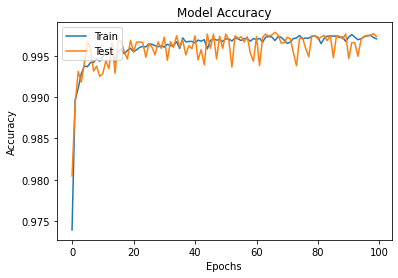

In [26]:
import matplotlib.pyplot as plt
plt.plot(modelhistory.history['accuracy'])
plt.plot(modelhistory.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend([ 'Train' , 'Test' ], loc= 'upper left' )
plt.savefig("Accuracy-Graph.pdf", format="pdf", bbox_inches="tight")
plt.show()

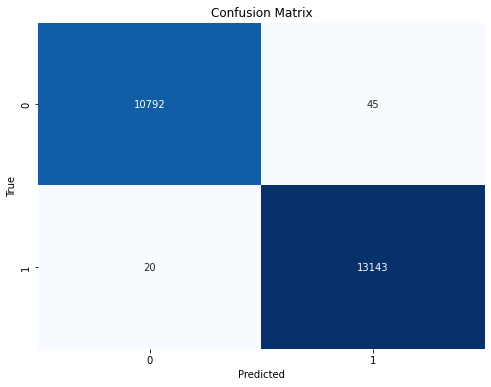

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pr)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

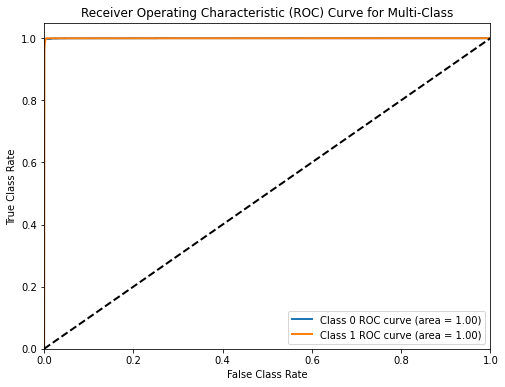

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(Y))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Class Rate')
plt.ylabel('True Class Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc='lower right')
plt.show()